# Práctica Bag of Words

En este cuaderno vamos a ver cómo podemos caracterizar un documento, en este caso un libro, a través de sus palabras más repetidas.

Comenzamos descargando los paquetes que necesitaremos e importando los módulos que vamos a utilizar:

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import requests #peticiones a una URL
from bs4 import BeautifulSoup #formato a contenido de web
from nltk.tokenize import word_tokenize #tokenizador
from nltk.corpus import stopwords #palabras vacías
from nltk.stem import SnowballStemmer #herramienta de stemming
from collections import Counter #diccionario de frecuencias
from wordcloud import WordCloud #herramienta de visualización
import matplotlib.pyplot as plt #herramientas de visualización

Vamos a construir una función que dada una url sea capaz de leer el texto presente en la misma y preprocesarlo:

In [ ]:
def leo_y_preproceso(url):
  # Descargamos el contenido de la URL
  respuesta = requests.get(url) #hago una llamada a la página
  contenido_respuesta = respuesta.content #accedo al contenido de la página

  # Extraigo el texto dentro del contenido
  contenido_formateado = BeautifulSoup(contenido_respuesta, 'html.parser')
  texto = contenido_formateado.get_text()

  # Preprocesamos el texto
  palabras = word_tokenize(texto) #tokenizo el texto
  palabras = [palabra.lower() for palabra in palabras] #paso las palabras a minúsculas
  palabras = [palabra for palabra in palabras if palabra.isalpha()] #descarto caracteres no alfabéticos
  palabras_vacias = set(stopwords.words('spanish')) #cargo las palabras vacías del español
  palabras = [palabra for palabra in palabras if palabra not in palabras_vacias] #elimino palabras vacías
  bag_of_words = Counter(palabras) # construyo el diccionario de frecuencias
  print(bag_of_words.most_common(10)) #imprimo en pantallas las diez palabras más frecuentes

  return bag_of_words, palabras


Comprobemos que la función ejecuta correctamente con la URL del Quijote:

In [15]:
bag_words_Quijote, palabras_Quijote = leo_y_preproceso("https://www.gutenberg.org/cache/epub/2000/pg2000.txt")

[('don', 2718), ('si', 1959), ('quijote', 1723), ('sancho', 1667), ('tan', 1235), ('señor', 1064), ('así', 1062), ('ser', 1059), ('bien', 1042), ('dijo', 933)]


Puedo acceder a la frecuencia de una palabra concreta:

In [16]:
bag_words_Quijote['rocinante']

206

Podemos probar con otra URL, en este caso de la Casa de Bernarda Alba:

In [17]:
enlace_Bernarda = "https://www.cervantesvirtual.com/obra-visor/la-casa-de-bernarda-alba-775125/html/6aef1659-90e7-443f-bd6c-a8fe62c4c04a_3.html#I_4_"
bag_words_Bernarda, palabras_Bernarda = leo_y_preproceso(enlace_Bernarda)

[('si', 20), ('adela', 18), ('angustias', 15), ('pepe', 14), ('martirio', 14), ('bernarda', 11), ('ojos', 11), ('casa', 10), ('pausa', 10), ('cosas', 10)]


In [18]:
bag_words_Bernarda['magdalena']

6

Además podemos visualizar esta información de manera que con un golpe de vista podamos caracterizar el texto:

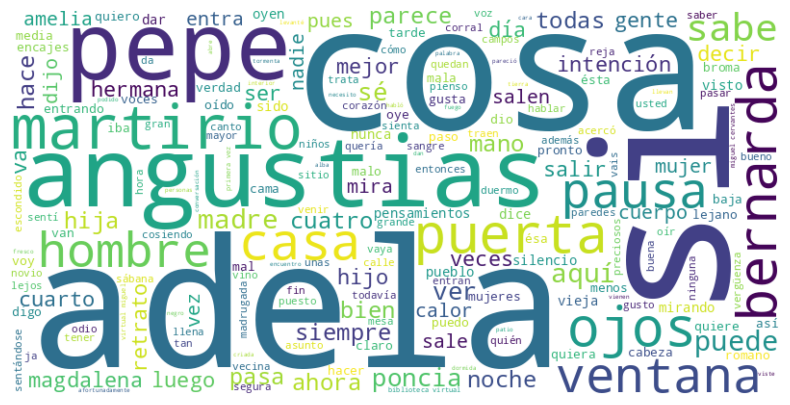

In [19]:
texto_Bernarda = ' '.join(palabras_Bernarda)
# Crear el objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_Bernarda)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Ocultar ejes
plt.show()

O también podemos hacer una visualización más rigurosa:

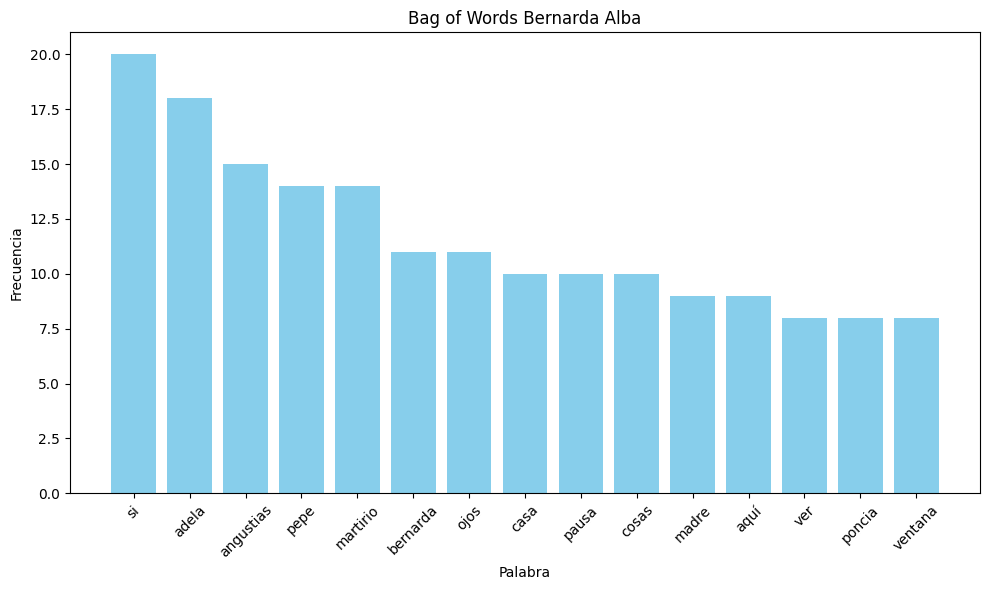

In [20]:
# Bag of words (puedes reemplazar esto con tu propio bag_of_words)
bag_of_words_ordenado = Counter(dict(sorted(bag_words_Bernarda.items(), key=lambda item: item[1], reverse=True)))

# Obtener las palabras y sus frecuencias
words = list(bag_of_words_ordenado.keys())[0:15]
frequencies = list(bag_of_words_ordenado.values())[0:15]

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies, color='skyblue')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.title('Bag of Words Bernarda Alba')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
